# 3 - Explorer les données / analyse

---

**Import des dépendances et des données en local**

In [ ]:
from math import ceil,sqrt,floor,pow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import seaborn as sns

filenamePath = 'en.openfoodfacts.org.products-df5.csv'
dataframe5 = pd.read_csv(filenamePath , dtype={'code_barres':'object'})

**bis :Import des dépendances et des données google colab**

In [1]:
from math import ceil,sqrt,floor,pow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import seaborn as sns
from google.colab import files

filenamePath = 'en.openfoodfacts.org.products-df5.csv'
uploaded = files.upload()

Saving en.openfoodfacts.org.products-df5.csv to en.openfoodfacts.org.products-df5.csv


In [2]:
import io
dataframe5 = pd.read_csv(io.BytesIO(uploaded[filenamePath]), dtype={'code_barres':'object'})

**Import des fonctions et constantes**

In [10]:
from scipy.stats import kruskal
from wordcloud import WordCloud
from PIL import Image

#Retourne un nombre x  de couleurs avec un espacement homogene contenus dans une colormap
def get_colors_from_listedcolormap(colormap, x):
    colors = []
    for i in range(0,x):
        if x <2:
            y=1
        else:
            y=i/(x-1)
        colors.append(COLORMAP.colors[floor((COLORMAP.N-1)*y)])
    return colors

#Retourne l'ensemble des labels du dataframe pour un certain dtype
def get_set_of_labels(dataframe,dtype):
    return {index for index, value in dataframe.dtypes.items() if value == dtype}

#Genere une grille carrée d'histogramme pour chaque variables de type dtype
def plot_sghisto(dataframe, dtype, color='', max_items=100, labels=[], title=''):        
    if not labels:
        if dtype == 'all':
            labels = dataframe.columns.values
        else:
            labels = get_set_of_labels(dataframe, dtype)
        
    labels_length = len(labels)
    dimension = ceil(sqrt(labels_length))
    dimension2 = int(pow(dimension,2))
    fig, axs = plt.subplots(dimension, dimension,figsize=(30,30))
    fig.suptitle(title, fontsize=32 , x=0.5,y=0.95)
    
    for i, value in enumerate(labels, start=0):
            x = floor(i/dimension)
            y = i - x*dimension
            if dataframe[value].dtype == 'object':
                df_index = dataframe[value].value_counts().index[max_items:]
                df_temp = dataframe[~dataframe[value].isin(df_index.values)]
                sns.histplot(data=df_temp, x=value,color=color, discrete=True,ax=axs[x,y])
                ax= axs[x,y]
                ax.set_xticklabels([])
            if dataframe[value].dtype =='float64':
                sns.histplot(data=dataframe, x=value, color=color, ax= axs[x,y])
            ax= axs[x,y]
            ax.set_xlabel(value, fontdict={'fontsize':18})
            ax.set_ylabel('')
            
    if dimension2 > labels_length:
        for i in range(labels_length,dimension2):
            x = floor(i/dimension)
            y = i - x*dimension
            axs[x,y].remove()

#fonction utile a wordcloud pour transformer un png en mask        
def transform_png_to_mask(path):
    def transform_format(val):
        if val == 0:
            return 255
        else:
            return val
    png = np.array(Image.open(path))
    transformed_png = np.ndarray((png.shape[0],png.shape[1]), np.int32)

    for i in range(len(png)):
        transformed_png[i] = list(map(transform_format, transformed_png[i]))
    
    return transformed_png

#Genere un wordcloud pour chaque labels, par defaut genere toutes les colonnes de dtype = object
def plot_wordcloud(dataframe, cmap, labels=[],title=''):        
    if not labels:
        labels = get_set_of_labels(dataframe,'object')
        
    labels_length = len(labels)
    dimension = ceil(sqrt(labels_length))
    dimension2 = int(pow(dimension,2))
    fig, axs = plt.subplots(dimension, dimension,figsize=(30,30))
    fig.suptitle(title, fontsize=32 , x=0.5,y=0.95)
    
    for i, value in enumerate(labels, start=0):
            x = floor(i/dimension)
            y = i - x*dimension
            word_freq = dataframe[value].value_counts().to_dict()
            wordcloud = WordCloud(width=500,\
                              height=500,\
                              max_words=100,\
                              background_color="white",\
                              #mask=transform_png_to_mask("nutriscore.png"),\
                              colormap=cmap\
                             ).generate_from_frequencies(word_freq)
            ax= axs[x,y]
            ax.imshow(wordcloud)
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_xlabel(value, fontdict={'fontsize':18})
            
    if dimension2 > labels_length:
        for i in range(labels_length,dimension2):
            x = floor(i/dimension)
            y = i - x*dimension
            axs[x,y].remove()


        
#Effectue un test de kruskal_wallis sur label en fonction de grouplabel avec un seuil alpha
def do_kruskal_test(dataframe,grouplabel,label,alpha):
    groups=[]
    for name in dataframe[grouplabel].value_counts().index:
        groups.append(dataframe[dataframe[grouplabel] == name][label])

    # Comparaison des échantillons
    stat, p = kruskal(*groups)
    print('statistics: {:.3f}, p = {:.3f}'.format(stat, p))
    
    # Décision
    alpha = 0.05
    print('grouplabel: {}, label: {}, alpha: {:.2f}'.format(grouplabel,label,alpha))
    if p > alpha:
        print('resultat: distributions identiques (ne pas rejeter H0)\n')
    else:
        print('resultat: distributions differentes (rejeter H0)\n')
        
#Mes couleurs
COLORMAP = sns.color_palette("plasma", as_cmap=True)
COLORS = get_colors_from_listedcolormap(COLORMAP,5)
COLOR_PRIMARY = COLORS[0]
COLOR_SECONDARY = COLORS[1]
COLOR_TERTIARY = COLORS[4]
COLOR_QUATERNARY = COLORS[2]
COLOR_QUINARY = COLORS[3]


**Visualisation**

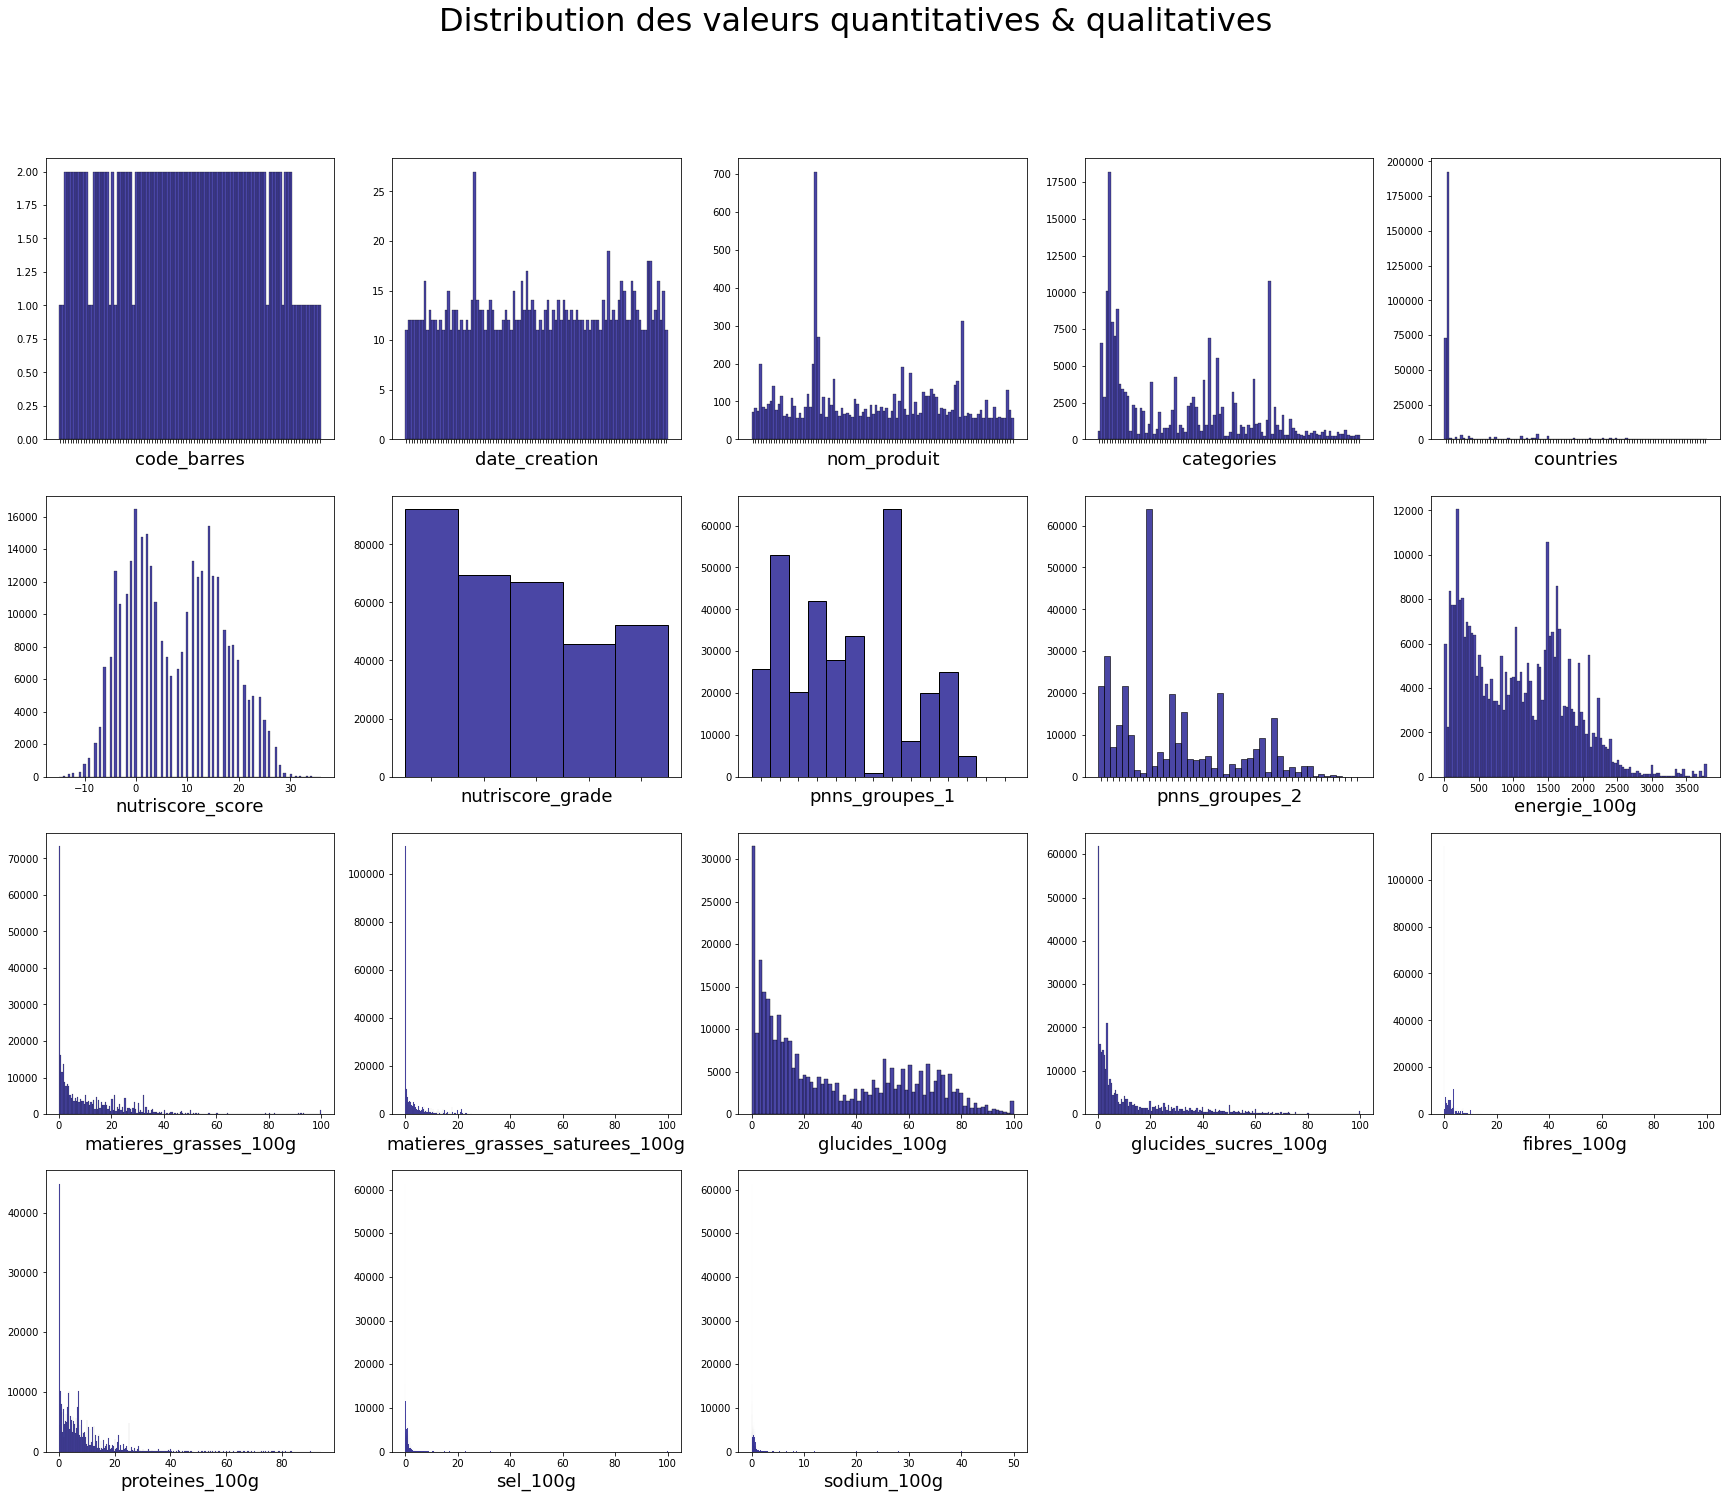

In [4]:
plot_sghisto(dataframe5, dtype='all', title='Distribution des valeurs quantitatives & qualitatives', color=COLOR_PRIMARY)

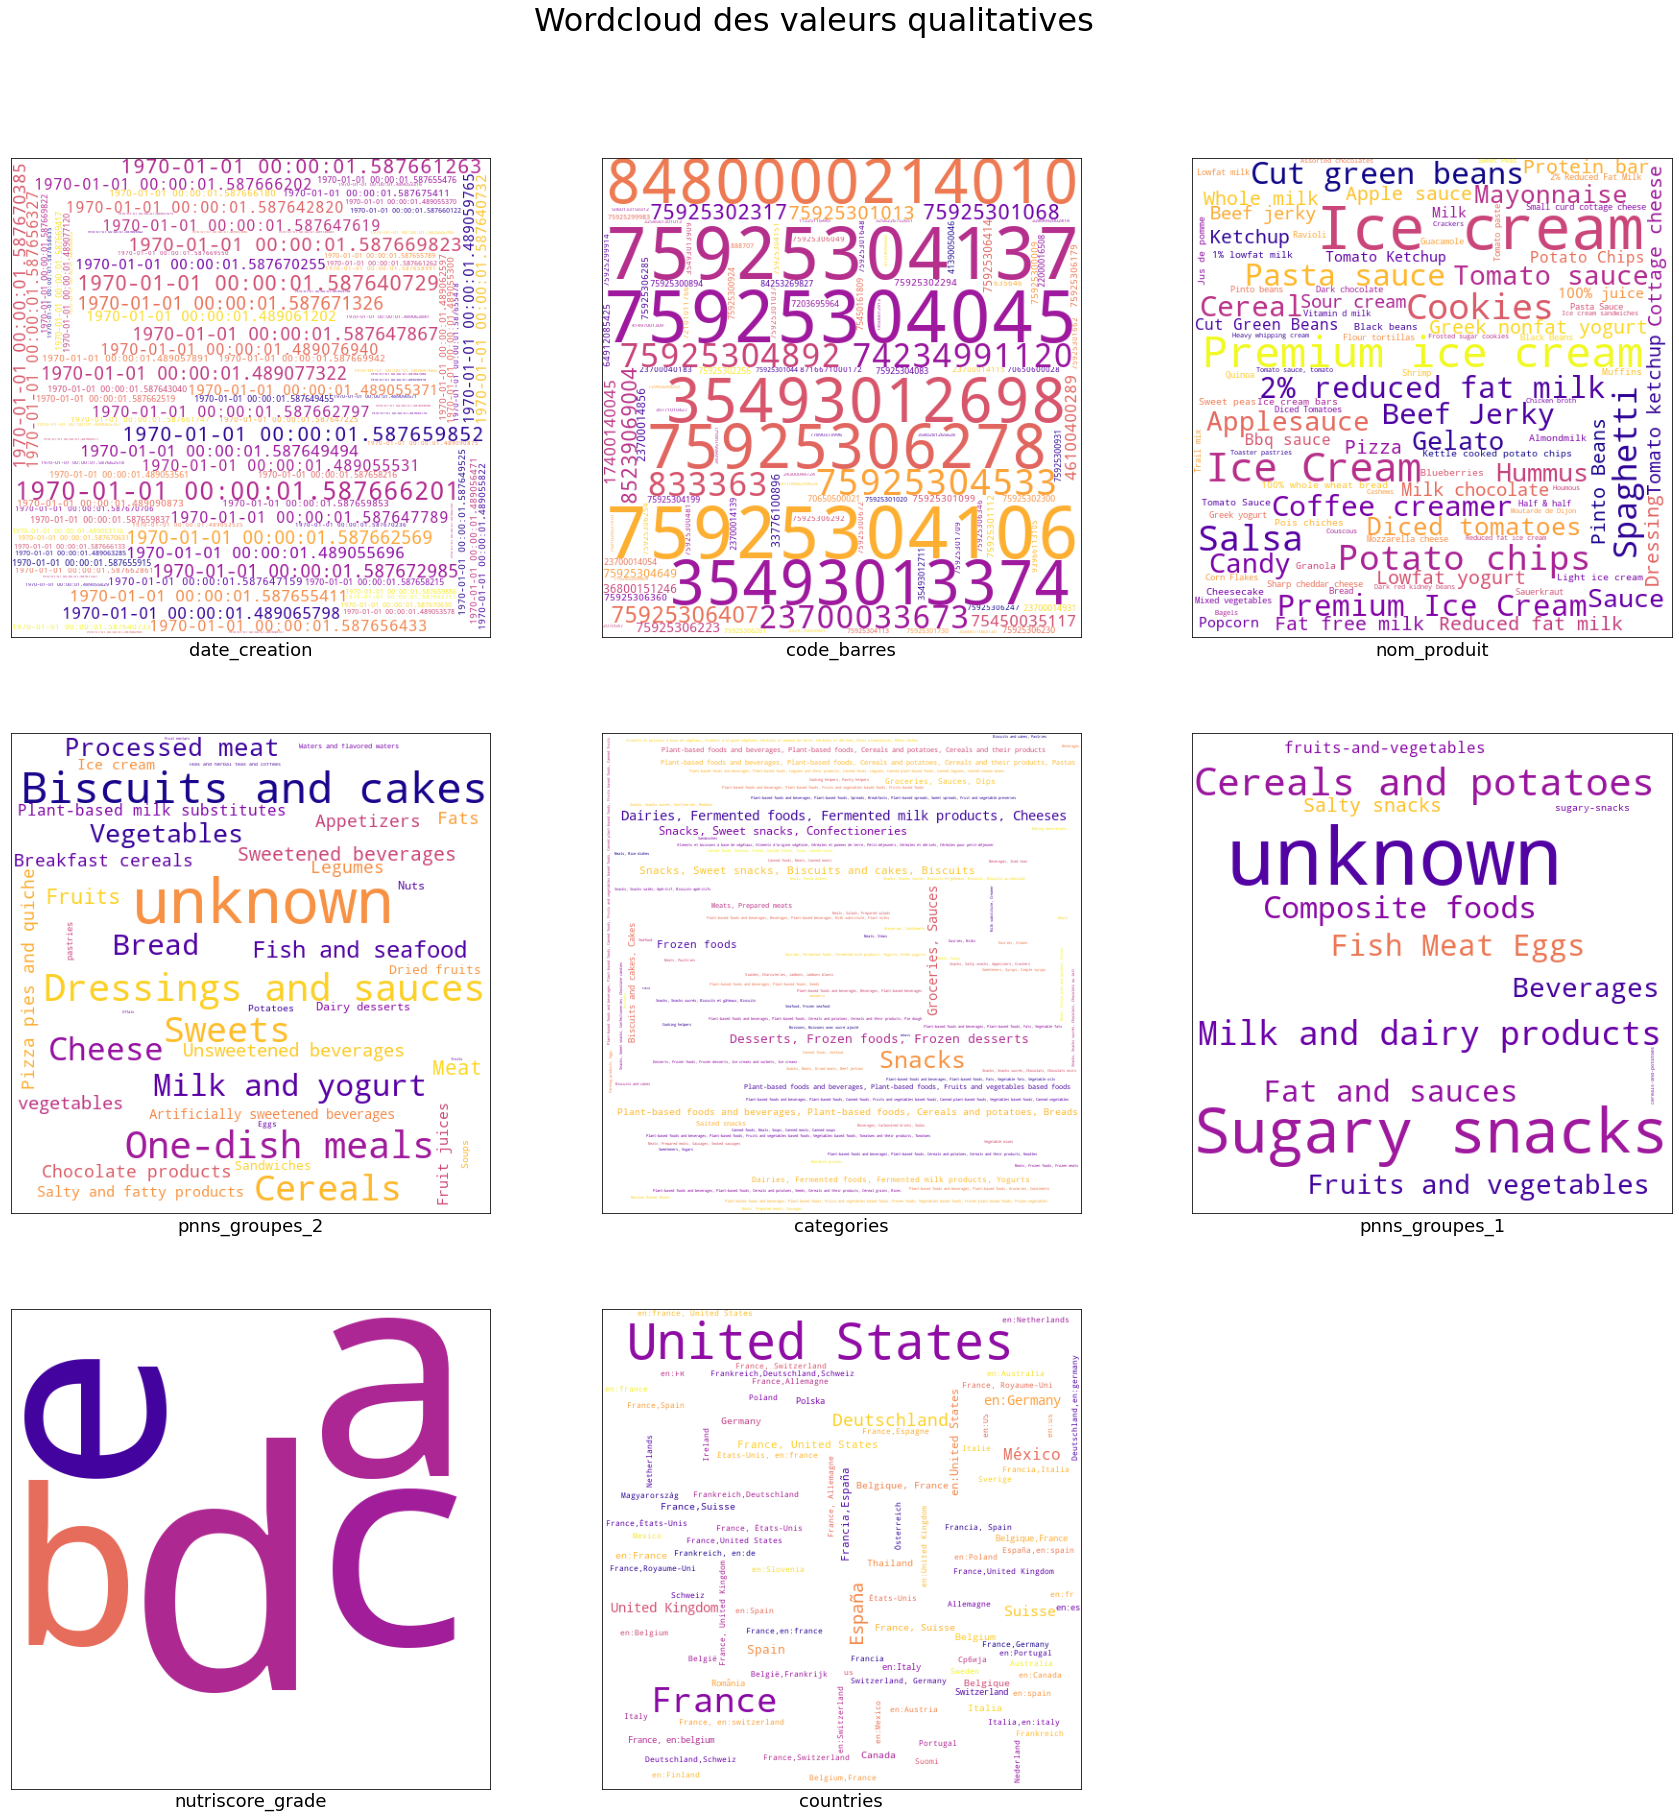

In [5]:
plot_wordcloud(dataframe5,title='Wordcloud des valeurs qualitatives', cmap = COLORMAP)

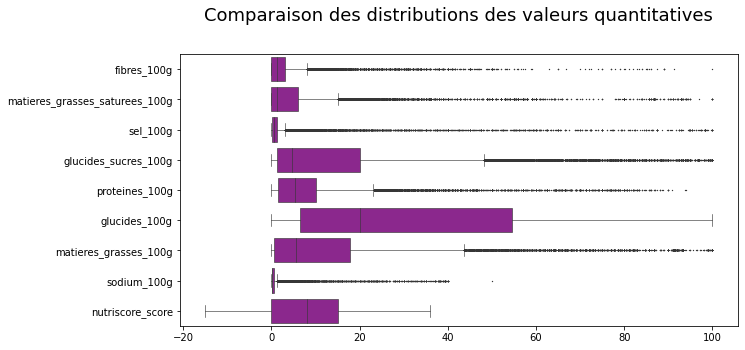

In [6]:
set_of_label = get_set_of_labels(dataframe5,'float64')
set_of_label.remove('energie_100g')

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Comparaison des distributions des valeurs quantitatives', fontdict={'fontsize':18}, x=0.5,y=1.1)

sns.boxplot(data=dataframe5[set_of_label], orient="h", linewidth=0.6,fliersize=0.5, ax=ax, color=COLOR_SECONDARY)

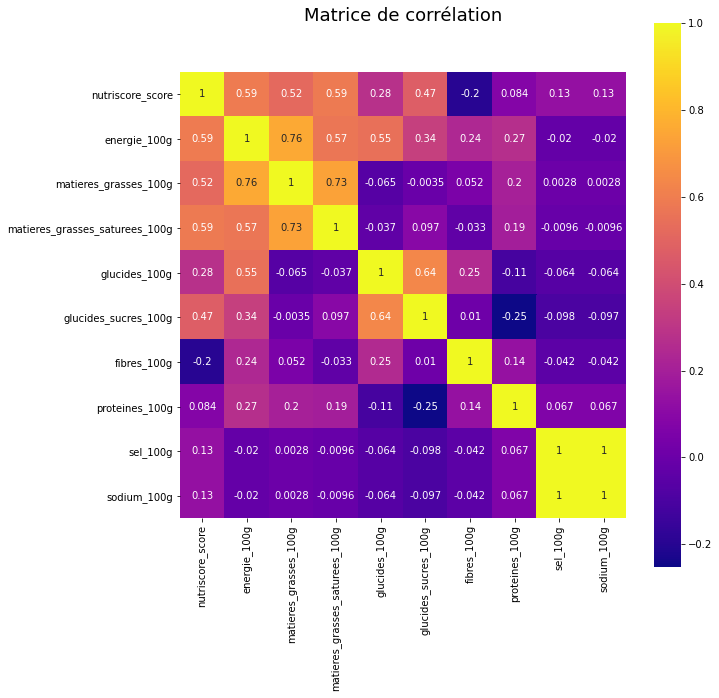

In [7]:
# Matrice de corrélation
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Matrice de corrélation', fontdict={'fontsize':18}, x=0.5,y=1.1)
sns.heatmap(dataframe5.corr(), annot=True,square=True, cmap=COLORMAP,ax=ax)

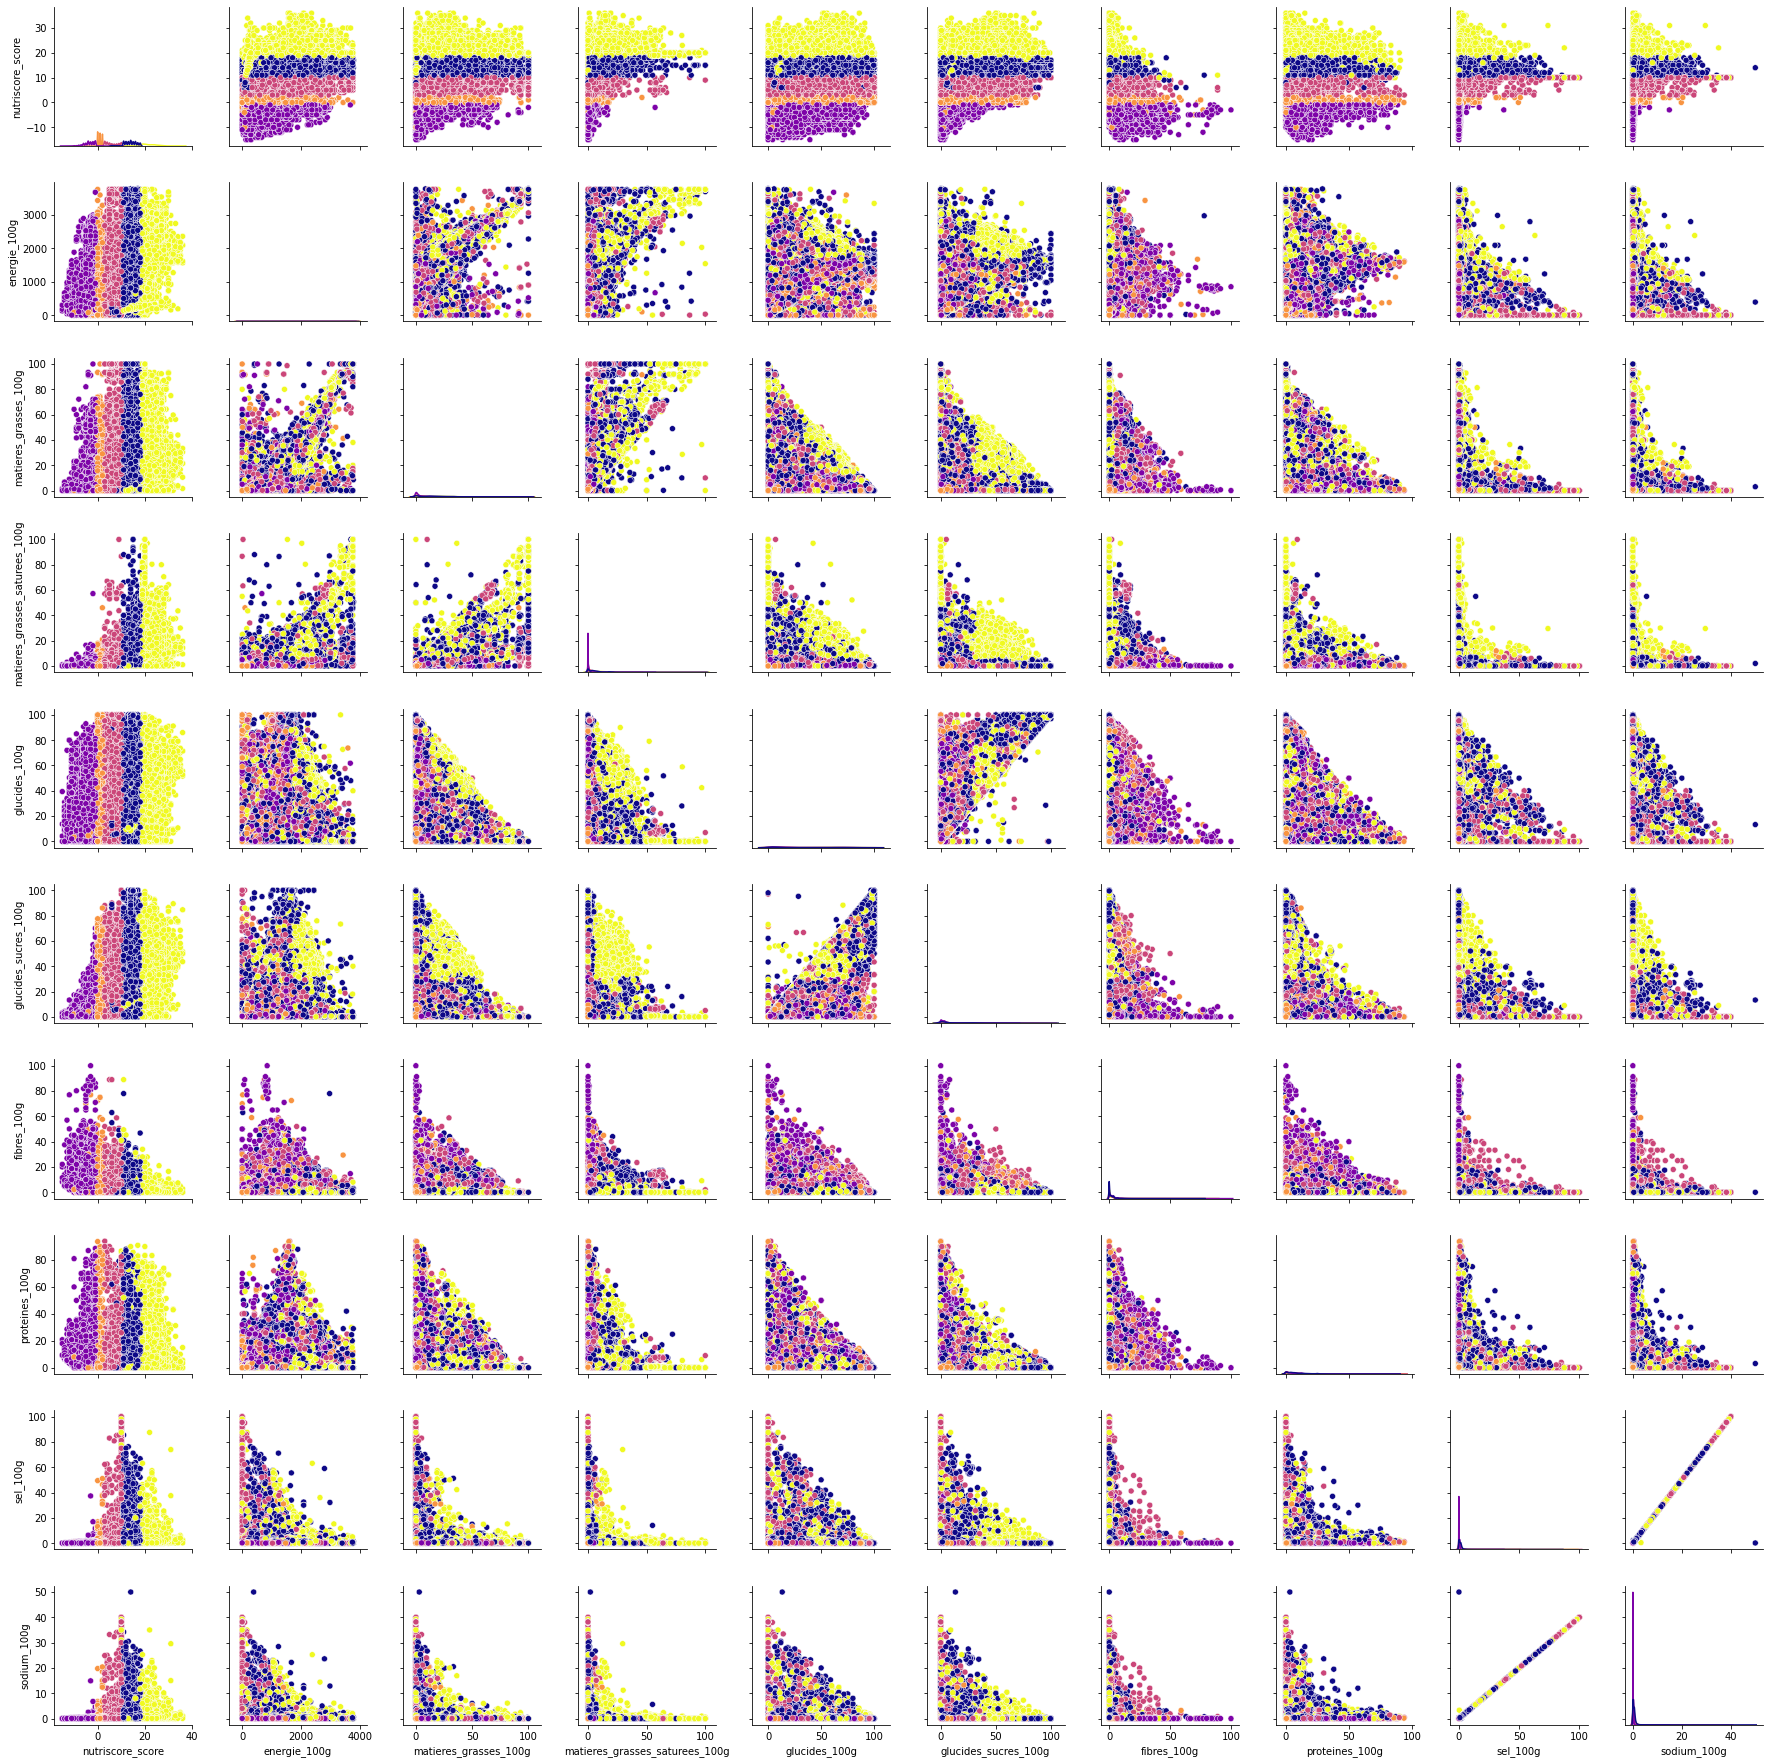

In [8]:
size = len(dataframe5["nutriscore_grade"].value_counts().index)
colors = get_colors_from_listedcolormap(COLORMAP,size)

g = sns.PairGrid(dataframe5, hue="nutriscore_grade", palette=colors)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)

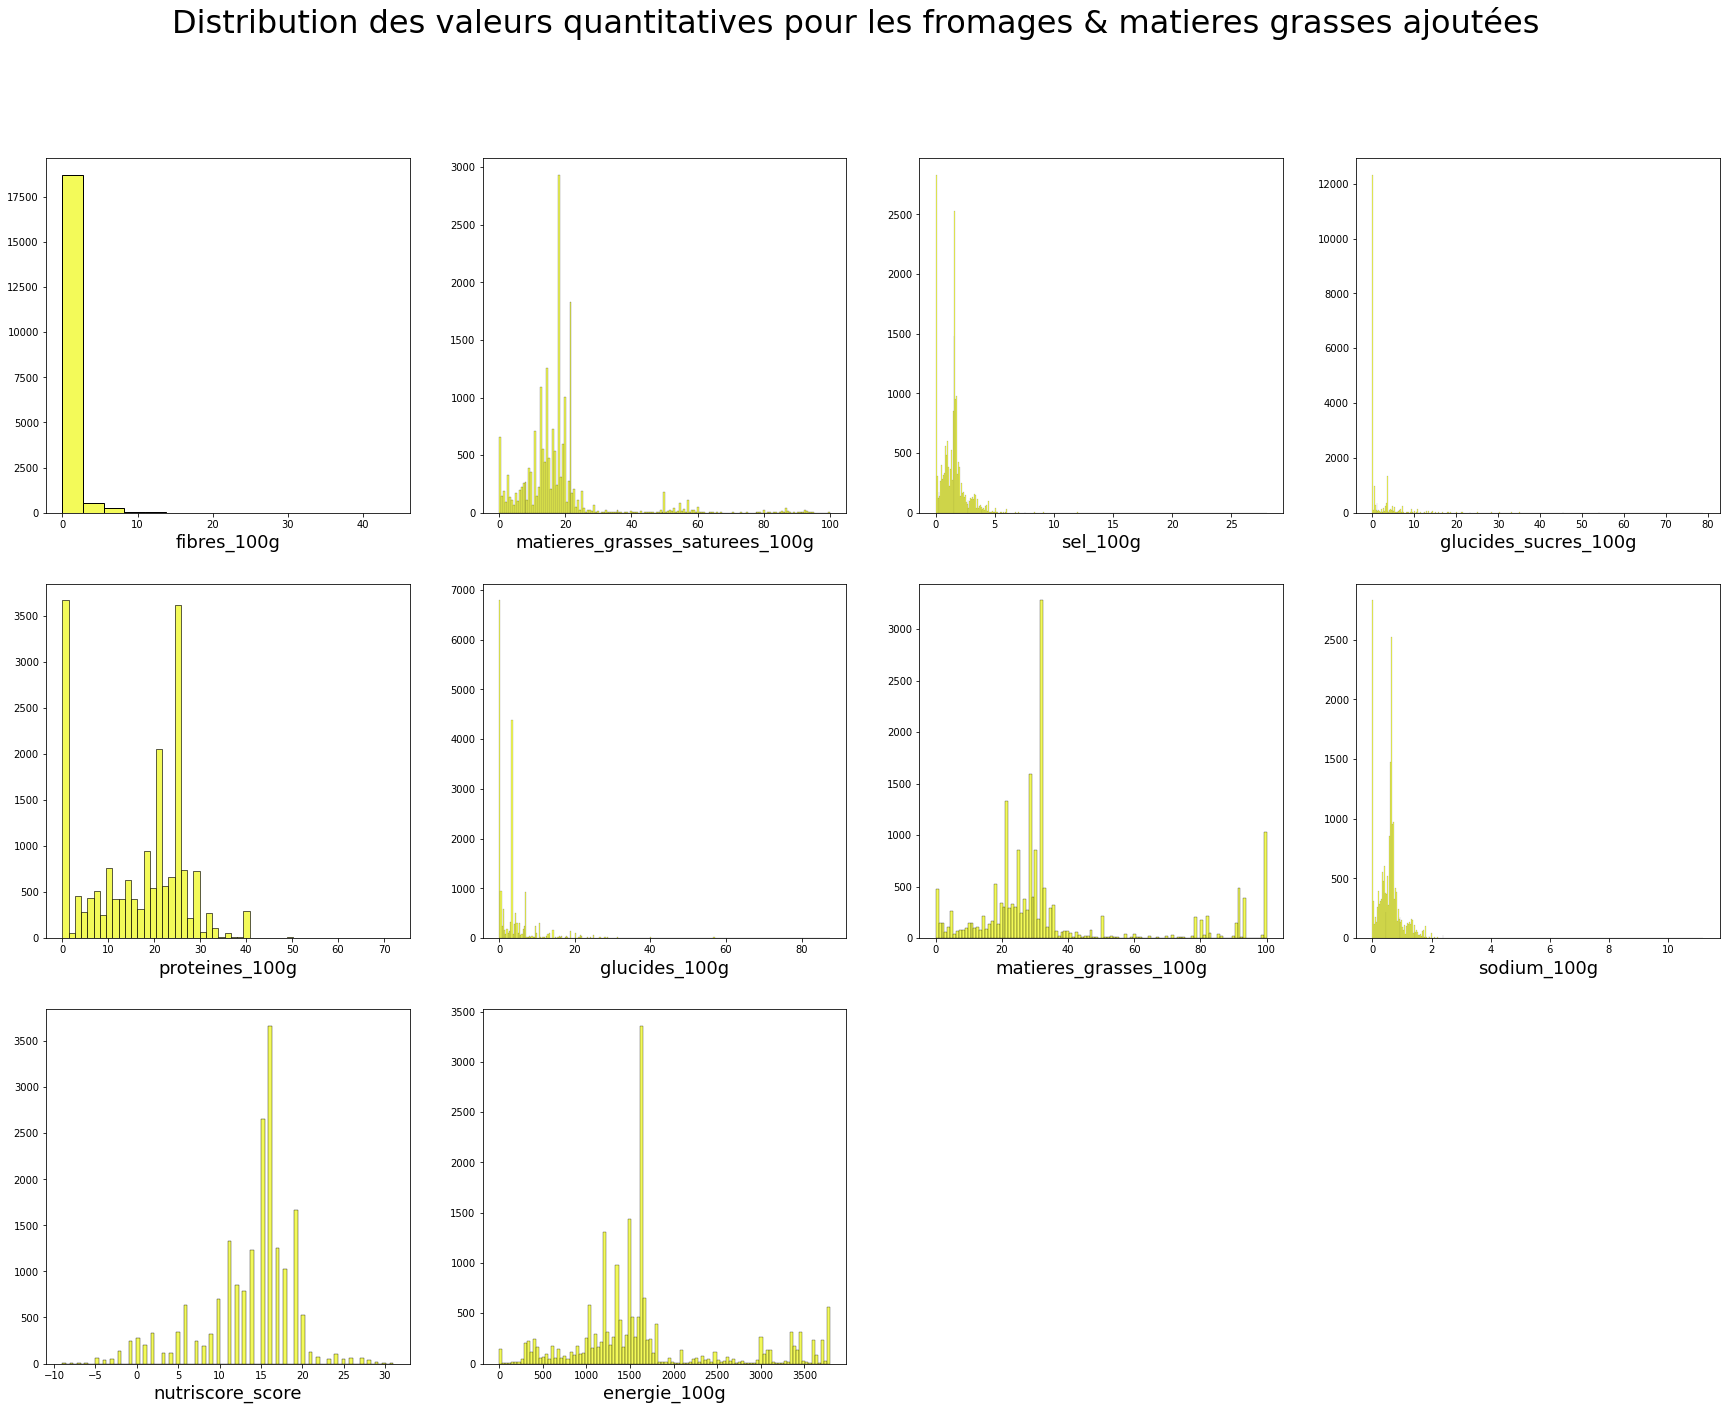

In [11]:
dataframe_fromages_mg = dataframe5[(dataframe5.pnns_groupes_2 == 'Fats')|\
                     (dataframe5.pnns_groupes_2 == 'Cheese')]

plot_sghisto(dataframe_fromages_mg, dtype='float64', title='Distribution des valeurs quantitatives pour les fromages & matieres grasses ajoutées', color=COLOR_TERTIARY)

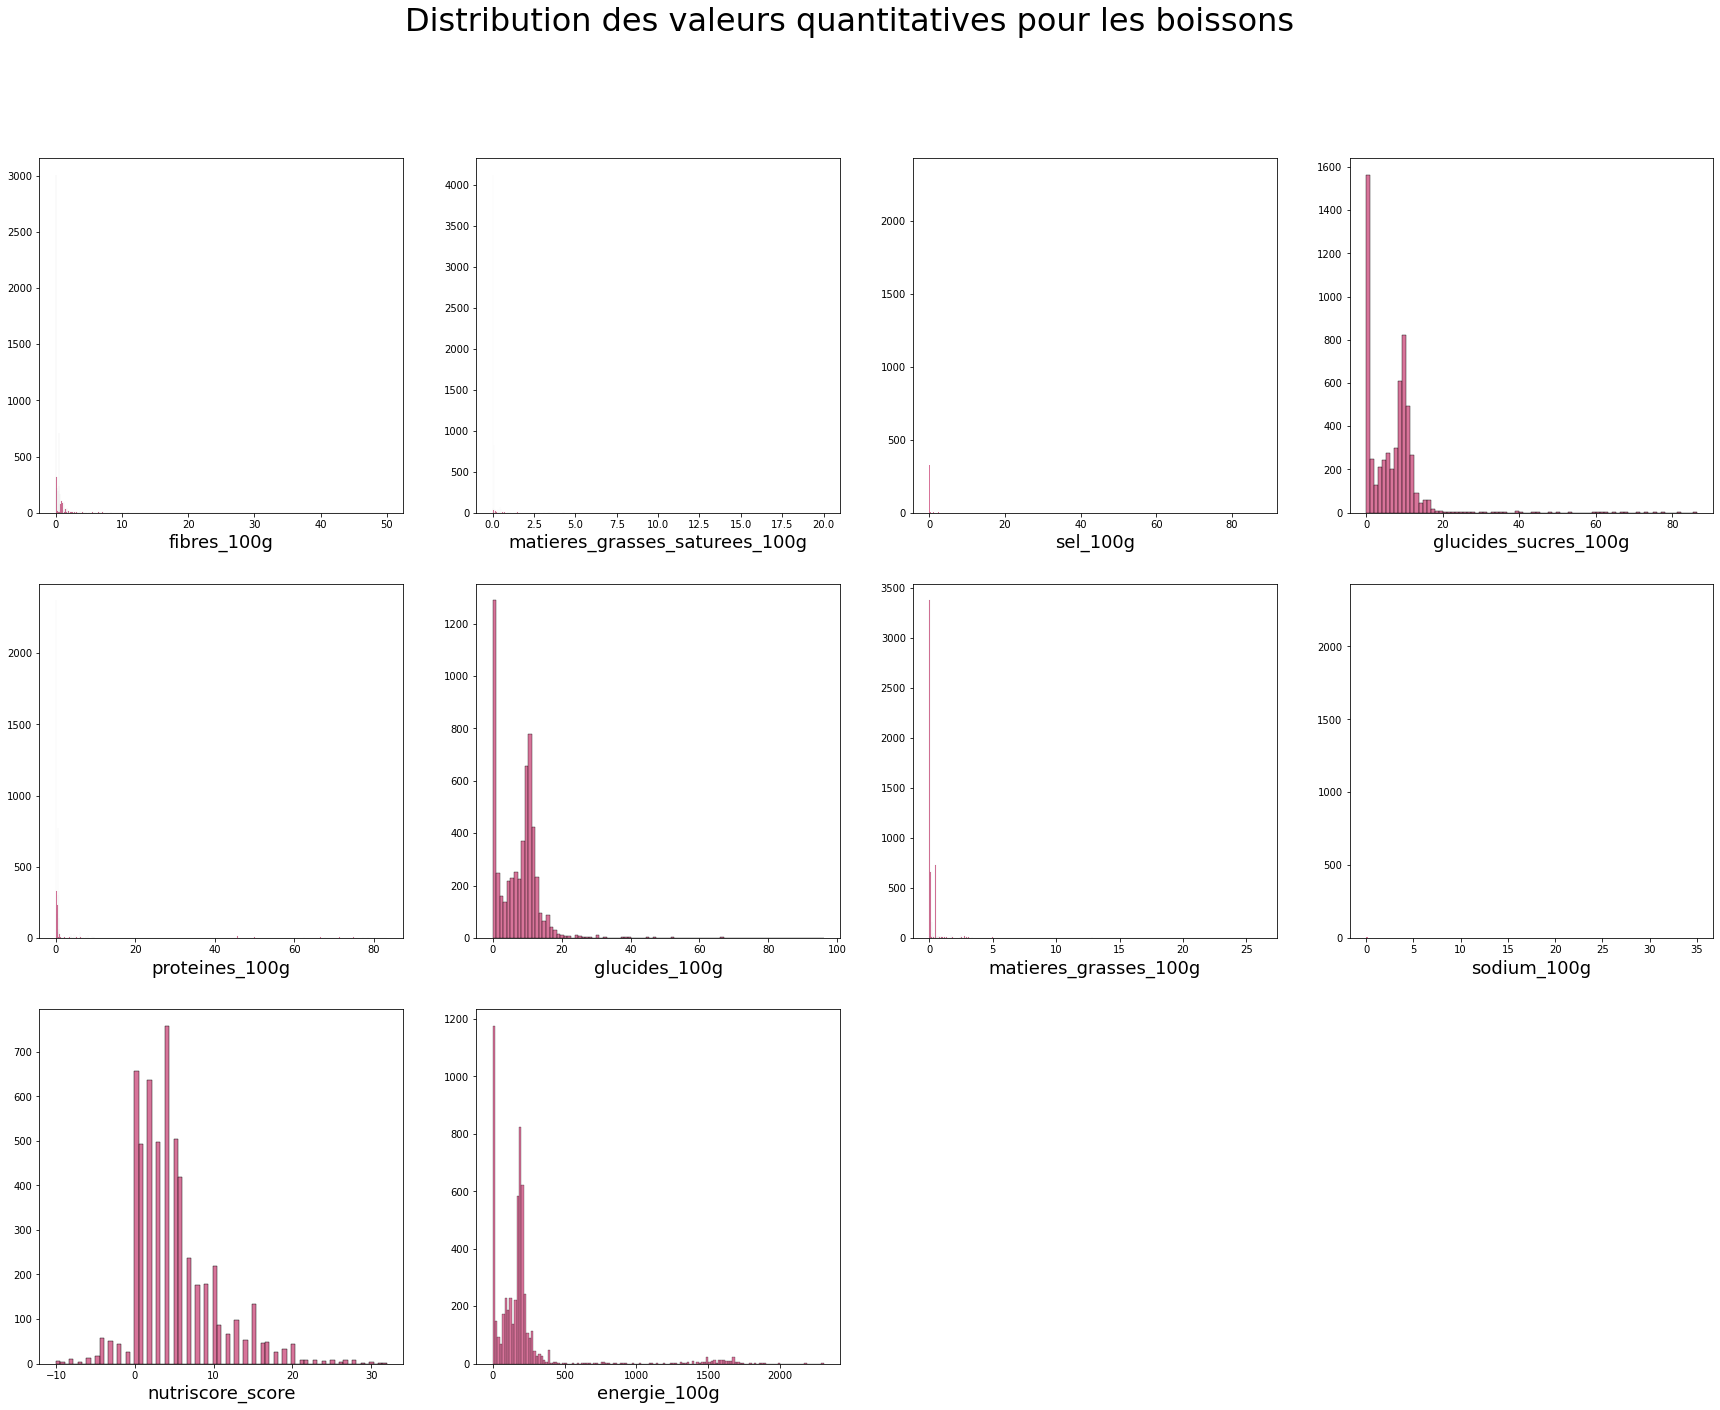

In [12]:
dataframe_boissons = dataframe5[(dataframe5.pnns_groupes_2 == 'Fruit juices')|\
                     (dataframe5.pnns_groupes_2 == 'Waters and flavored waters')|\
                     (dataframe5.pnns_groupes_2 == 'Fruit nectars')|\
                     (dataframe5.pnns_groupes_2 == 'Artificially sweetened beverages')]

plot_sghisto(dataframe_boissons, dtype='float64', title='Distribution des valeurs quantitatives pour les boissons', color=COLOR_QUATERNARY)

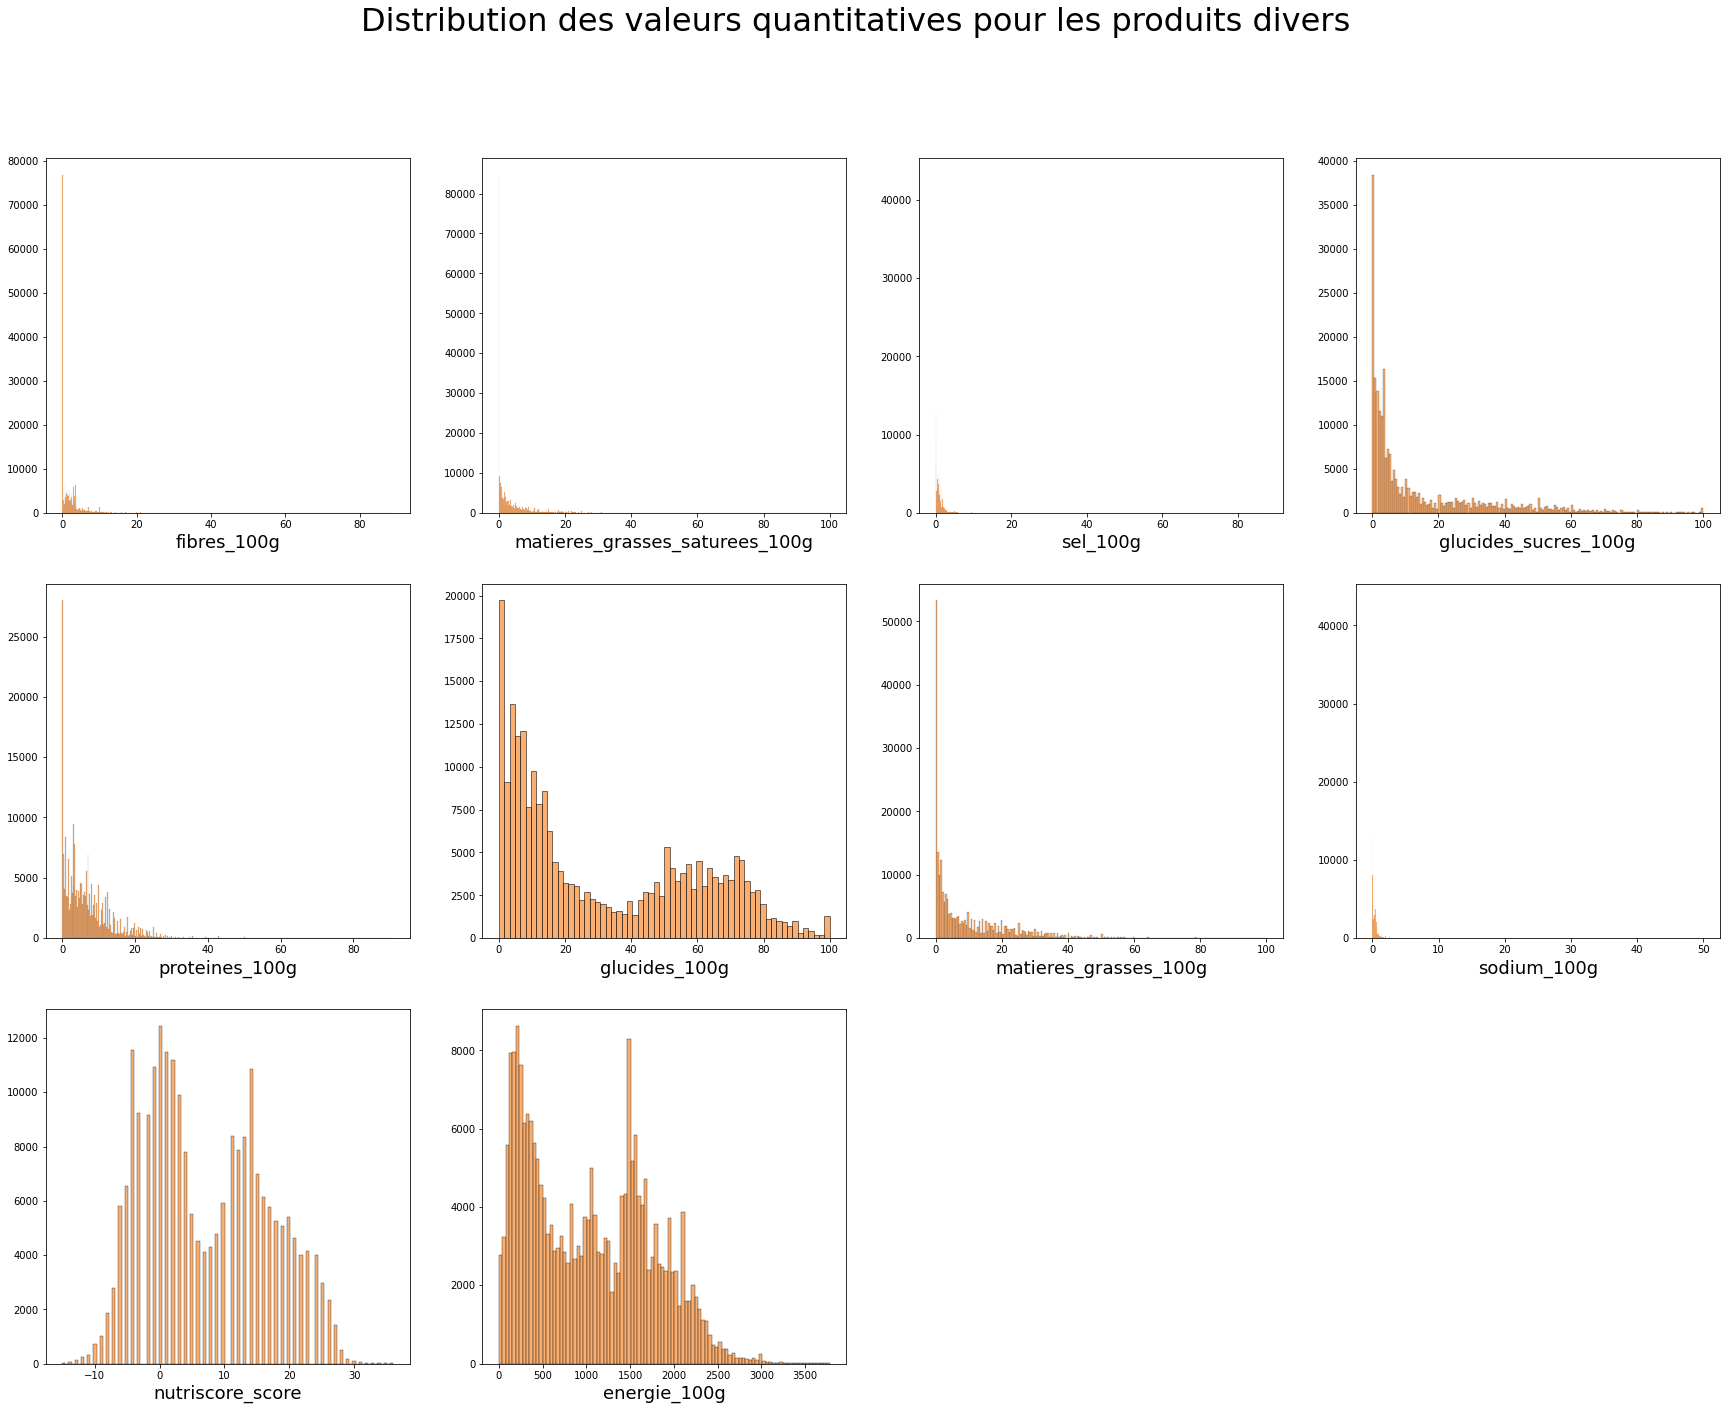

In [13]:
dataframe_divers = dataframe5[~((dataframe5.pnns_groupes_2 == 'Fruit juices')|\
                     (dataframe5.pnns_groupes_2 == 'Waters and flavored waters')|\
                     (dataframe5.pnns_groupes_2 == 'Fruit nectars')|\
                     (dataframe5.pnns_groupes_2 == 'Artificially sweetened beverages')|\
                     (dataframe5.pnns_groupes_2 == 'Fats')|\
                     (dataframe5.pnns_groupes_2 == 'Cheese')|\
                     (dataframe5.pnns_groupes_2 == 'unknown'))]

plot_sghisto(dataframe_divers, dtype='float64', title='Distribution des valeurs quantitatives pour les produits divers', color=COLOR_QUINARY)

In [ ]:
#dataframe_divers['type']='divers'
#dataframe_boissons['type'] ='boissons'
#dataframe_fromages_mg['type']='fromages_mg'

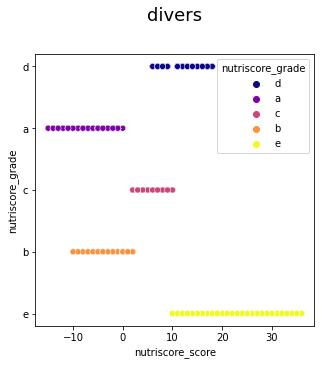

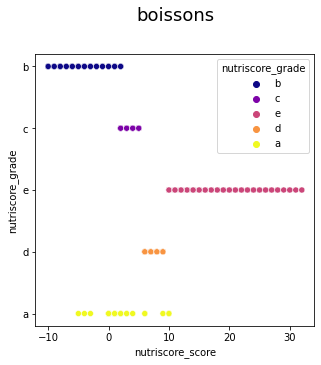

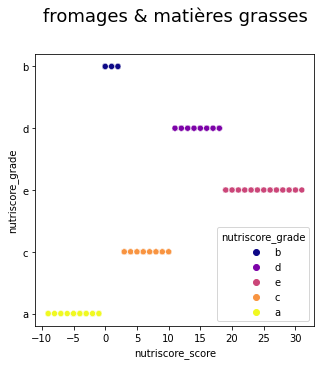

In [14]:
views=[dataframe_divers,dataframe_boissons,dataframe_fromages_mg]
labels=['divers','boissons','fromages & matières grasses']

for label, view in zip(labels, views):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(label, fontdict={'fontsize':18}, x=0.5,y=1.1)
    sns.scatterplot(data=view, x="nutriscore_score", y="nutriscore_grade", hue="nutriscore_grade", palette=get_colors_from_listedcolormap(COLORMAP,5))
    plt.show()

**Test de Kruskal-wallis**

In [15]:
for label in get_set_of_labels(dataframe5,'float64'):
    do_kruskal_test(dataframe5,'nutriscore_grade',label,0.05)

statistics: 31728.001, p = 0.000
grouplabel: nutriscore_grade, label: fibres_100g, alpha: 0.05
resultat: distributions differentes (rejeter H0)

statistics: 101915.944, p = 0.000
grouplabel: nutriscore_grade, label: matieres_grasses_saturees_100g, alpha: 0.05
resultat: distributions differentes (rejeter H0)

statistics: 41352.990, p = 0.000
grouplabel: nutriscore_grade, label: sel_100g, alpha: 0.05
resultat: distributions differentes (rejeter H0)

statistics: 47770.038, p = 0.000
grouplabel: nutriscore_grade, label: glucides_sucres_100g, alpha: 0.05
resultat: distributions differentes (rejeter H0)

statistics: 4525.670, p = 0.000
grouplabel: nutriscore_grade, label: proteines_100g, alpha: 0.05
resultat: distributions differentes (rejeter H0)

statistics: 16202.443, p = 0.000
grouplabel: nutriscore_grade, label: glucides_100g, alpha: 0.05
resultat: distributions differentes (rejeter H0)

statistics: 84777.169, p = 0.000
grouplabel: nutriscore_grade, label: matieres_grasses_100g, alpha: 

**Conclusions**   
Le nutriscore-grade devrait être identique pour le même nutriscore-score des produits d'une même catégorie.

Malgré des distributions significativements différentes entre les groupes disctincts de nutriscore-grade, il sera difficile de classer en fonction des nutriments notre produit afin de réaliser un calcul exact du nutriscore ou de réaliser une prédiction.